# Evaluation with GSIM indices - Plotting

This script uses all saved variables - see other script for processing. 


Inne Vanderkelen


In [1]:
# import modules
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib as mpl
import os
import hydroeval as he
import pickle
import utils
import warnings
import cartopy as cart
import matplotlib as mpl

warnings.filterwarnings('ignore')

# plot settings
utils.set_plot_param()

In [2]:
### Initialisation

# model directory
outdir = '/glade/work/ivanderk/mizuRoute_global/route/'

# current working directory
scriptsdir = os.getcwd() + '/'

# observations dir
datadir = '/glade/work/ivanderk/data/'

# give simulation name
case_H06 =  'H06'
case_nolake =  'nolake'
case_natlake =  'natlake'

cases = [case_nolake,case_natlake,case_H06]
cases_longname = [  'no lakes','natural lakes','Hanasaki']
colors = [ 'skyblue','yellowgreen', 'coral']

timestep = 'monthly' # monthly # yearly

units = {'KGE': '-', 'NSE': '-', 'RMSE': 'm³/s', 'MARE': '-','PBIAS': '%', 'PABIAS':'%'}


indices =['MEAN','SD','MAX',  'MIN','CV']

panel_labels = ['a.', 'b.', 'c.', 'd.', 'e.', 'f.', 'g.', 'h.', 'i.', 'j.', 'k.', 'l.', 'm.', 'n.', 'o.', 'p.', 'q.', 'r.', 's.', 't.', 'u.', 'v.', 'w.']



## 1. Load GSIM metrics 

In [3]:
# differences in metrics between cases
metrics_dnatlak_dict = pickle.load( open(datadir+"/gsim/processed/metrics_dnatlak_dict.pkl", "rb" ) )
metrics_dnolak_dict = pickle.load( open( datadir+"/gsim/processed/metrics_dnolak_dict.pkl", "rb" ) )
indices_permetric_percase_dict = pickle.load( open(datadir+"/gsim/processed/indices_permetric_percase_dict.pkl", "rb" ) )



In [4]:
gdf_stations = gpd.read_file(datadir+'gsim/stations/stations_HDMA_intersect_controlled.shp')
gdf_stations_controlled = gdf_stations.loc[gdf_stations['controlled']==1]

## 2. Plotting

In [5]:

def map_gsim_rmse_diff(index, metric_diff_dict,  case_comp, ticks=[-1000,-100,-10,-1,1,10,100,1000]): 

    metric = 'RMSE'
    case_1 = 'ANT'

    case_diff = case_1+ ' - '+case_comp
    df_diff = metric_diff_dict[metric]

    # merge metric per station to 
    gdf_metric = gdf_stations.merge(df_diff, left_on = 'gsim.no',right_on='gsim_no',how='inner')



    title =  ' $\Delta$' +metric + ' for '+index
    cbar_label = units[metric]
    cmap = 'PRGn'
    column_toplot = index
    gdf_toplot = gdf_metric
    norm = mpl.colors.BoundaryNorm(boundaries=ticks, ncolors=256)
    proj=ccrs.PlateCarree()
    plt.rcParams["figure.figsize"] = (16,10)
    ax = plt.axes(projection=proj, frameon=False)
    gdf_toplot.set_crs("EPSG:4326").plot(ax=ax, column=column_toplot, legend=True, norm = norm, cmap=cmap, legend_kwds={ 'fraction': 0.018,'pad':0.02, 'extend':'both', 'orientation':'vertical'})
    ax.coastlines(color='dimgray', linewidth=0.5, resolution='110m')
    ax.set_title(title, loc='right');
    ax.add_feature(cart.feature.LAND, zorder=0, color="darkgray", edgecolor='w');
    ax.set_extent((-180,180,-63,90), crs=proj) 
    ax.annotate('RMSE [m³/s]', xy=(1.09,0.42), xycoords=("axes fraction"), xytext=(1.09,0.42), fontsize=12, rotation=90, color="dimgray"); 

    xpos = 1.12
    ypos = 0.5

    ax.annotate('', xy=(xpos,ypos), xycoords=("axes fraction"), xytext=(xpos,ypos+0.47), arrowprops=dict(arrowstyle="<-", color="darkgreen",linewidth=2));
    ax.annotate('', xy=(xpos,ypos), xycoords=("axes fraction"), xytext=(xpos,ypos-0.47), arrowprops=dict(arrowstyle="<-", color="rebeccapurple",linewidth=2));

    xpos_text = xpos+0.02

    ax.annotate(case_comp+' better skill', xy=(xpos_text,ypos+0.25), xycoords=("axes fraction"), xytext=(xpos_text,ypos+0.08), fontsize=14, rotation=90, color="darkgreen", fontweight="semibold"); 
    ax.annotate(case_1+' better skill', xy=(xpos_text,ypos-0.25), xycoords=("axes fraction"), xytext=(xpos_text,ypos-0.35), fontsize=14, rotation=90, color="rebeccapurple", fontweight="semibold"); 

    return ax

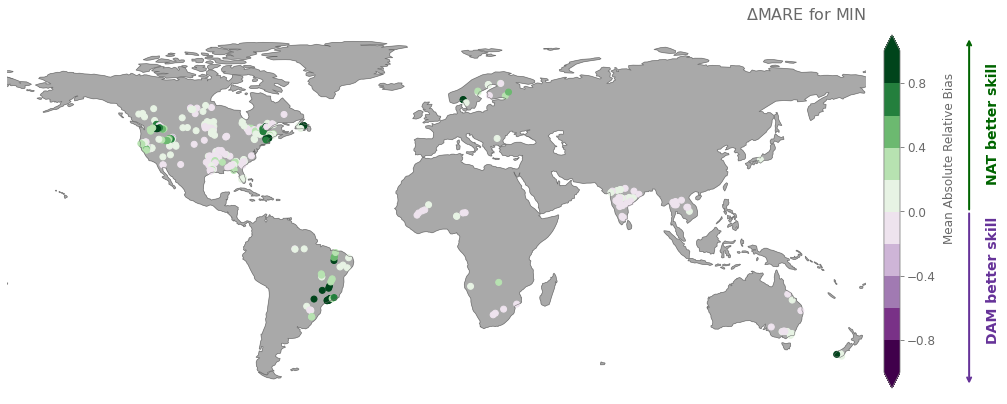

In [6]:

def map_gsim_mare_diff(index, metric_diff_dict,  case_comp, ticks): 

    metric = 'MARE'
    case_1 = 'DAM'
    #ticks=np.arange(-1,1.2,0.2)

    case_diff = case_1+ ' - '+case_comp
    df_diff = metric_diff_dict[metric]

    # merge metric per station to 
    gdf_metric = gdf_stations.merge(df_diff, left_on = 'gsim.no',right_on='gsim_no',how='inner')



    title =  ' $\Delta$' +metric + ' for '+index
    cbar_label = units[metric]
    cmap = 'PRGn'
    column_toplot = index
    gdf_toplot = gdf_metric
    norm = mpl.colors.BoundaryNorm(boundaries=ticks, ncolors=256)
    proj=ccrs.PlateCarree()
    plt.rcParams["figure.figsize"] = (16,10)
    ax = plt.axes(projection=proj, frameon=False)
     #norm = norm,
    gdf_toplot.set_crs("EPSG:4326").plot(ax=ax, column=column_toplot, legend=True, norm=norm, cmap=cmap, legend_kwds={ 'fraction': 0.018,'pad':0.02, 'extend':'both', 'orientation':'vertical'})
    ax.coastlines(color='dimgray', linewidth=0.5, resolution='110m')
    ax.set_title(title, loc='right');
    ax.add_feature(cart.feature.LAND, zorder=0, color="darkgray", edgecolor='w');
    ax.set_extent((-180,180,-63,90), crs=proj) 
    ax.annotate('Mean Absolute Relative Bias', xy=(1.09,0.3), xycoords=("axes fraction"), xytext=(1.09,0.42), fontsize=12, rotation=90, color="dimgray"); 

    xpos = 1.12
    ypos = 0.5

    ax.annotate('', xy=(xpos,ypos), xycoords=("axes fraction"), xytext=(xpos,ypos+0.47), arrowprops=dict(arrowstyle="<-", color="darkgreen",linewidth=2));
    ax.annotate('', xy=(xpos,ypos), xycoords=("axes fraction"), xytext=(xpos,ypos-0.47), arrowprops=dict(arrowstyle="<-", color="rebeccapurple",linewidth=2));

    xpos_text = xpos+0.02

    ax.annotate(case_comp+' better skill', xy=(xpos_text,ypos+0.25), xycoords=("axes fraction"), xytext=(xpos_text,ypos+0.08), fontsize=14, rotation=90, color="darkgreen", fontweight="semibold"); 
    ax.annotate(case_1+' better skill', xy=(xpos_text,ypos-0.25), xycoords=("axes fraction"), xytext=(xpos_text,ypos-0.35), fontsize=14, rotation=90, color="rebeccapurple", fontweight="semibold"); 

    return ax

index = 'MIN'

ax = map_gsim_mare_diff(index, metrics_dnatlak_dict,  'NAT', np.arange(-1,1.2,0.2))


In [7]:

def map_gsim_pabias_diff(index, metric_diff_dict,  case_comp, ticks,ax=False, plot_colorbar=True): 

    metric = 'PABIAS'
    metric_longname = '|PBIAS|'
    case_1 = 'DAM'
    #ticks=np.arange(-1,1.2,0.2)

    case_diff = case_1+ ' - '+case_comp
    df_diff = metric_diff_dict[metric]

    # merge metric per station to 
    gdf_metric = gdf_stations.merge(df_diff, left_on = 'gsim.no',right_on='gsim_no',how='inner')



    title =  ' $\Delta$ ' +metric_longname + ' for '+index
    cbar_label = units[metric]
    cmap = 'PRGn'
    column_toplot = index
    gdf_toplot = gdf_metric
    norm = mpl.colors.BoundaryNorm(boundaries=ticks, ncolors=256)
    proj=ccrs.PlateCarree()
    plt.rcParams["figure.figsize"] = (16,10)
    
    if not ax: 
        ax = plt.axes(projection=proj, frameon=False)
     #norm = norm,
    if plot_colorbar:
        flag_legend = True
    else: flag_legend = False
    
    gdf_toplot.set_crs("EPSG:4326").plot(ax=ax, column=column_toplot, legend=flag_legend, norm=norm, cmap=cmap, legend_kwds={ 'fraction': 0.018,'pad':0.02, 'extend':'both', 'orientation':'vertical'})

    ax.coastlines(color='dimgray', linewidth=0.5, resolution='110m')
    ax.set_title(title, loc='right', fontsize=14);
    ax.add_feature(cart.feature.LAND, zorder=0, color="darkgray", edgecolor='w')  
    ax.set_extent((-180,180,-63,90), crs=proj) 
    
    if plot_colorbar:    
        ax.annotate('[%]', xy=(1.09,0.3), xycoords=("axes fraction"), xytext=(1.09,0.48), fontsize=12, rotation=90, color="dimgray"); 

        xpos = 1.12
        ypos = 0.5

        ax.annotate('', xy=(xpos,ypos), xycoords=("axes fraction"), xytext=(xpos,ypos+0.47), arrowprops=dict(arrowstyle="<-", color="darkgreen",linewidth=2));
        ax.annotate('', xy=(xpos,ypos), xycoords=("axes fraction"), xytext=(xpos,ypos-0.47), arrowprops=dict(arrowstyle="<-", color="rebeccapurple",linewidth=2));

        xpos_text = xpos+0.02
        
        if case_comp == 'NAT': 
            d_ypos = 0.08
            d_ypos_dam = 0.38
        else: 
            d_ypos = 0.03
            d_ypos_dam = 0.4            

        ax.annotate(case_comp+' better skill', xy=(xpos_text,ypos+0.25), xycoords=("axes fraction"), xytext=(xpos_text,ypos+d_ypos), fontsize=14, rotation=90, color="darkgreen", fontweight="semibold"); 
        ax.annotate(case_1+' better skill', xy=(xpos_text,ypos-0.25), xycoords=("axes fraction"), xytext=(xpos_text,ypos-d_ypos_dam), fontsize=14, rotation=90, color="rebeccapurple", fontweight="semibold"); 

    return ax

In [8]:


def plot_boxplot(ax,indices_permetric_percase_dict, cases, metric, index, limits, flag_subplot=False ):

    indices =['MAX', 'MEAN', 'MIN','SD','CV', 'PABIAS']
    units = {'KGE': '-', 'NSE': '-', 'RMSE': 'm³/s', 'MARE': '-','PBIAS': '%', 'PABIAS':'%'}

    if metric == 'PABIAS': metric_longname = '|PBIAS|'
    else : metric_longname = metric
    # get data in boxplot format
    data_for_boxplot = np.empty((len(indices_permetric_percase_dict[cases[0]][metric][index]), len(cases)))
    for j, case in enumerate(cases):
        data_for_boxplot[:,j] = indices_permetric_percase_dict[case][metric][index].values 
    data_for_boxplot[np.isinf(data_for_boxplot)] = np.nan # remove infinite values
    data_for_boxplot = data_for_boxplot[~np.isnan(data_for_boxplot).any(axis=1),:] # remove rows with nans

    bplot = ax.boxplot(data_for_boxplot,patch_artist=True, medianprops=dict(color='k'),  whiskerprops=dict(color="dimgray"), flierprops=dict(color="dimgray", markeredgecolor="dimgray"))
    ax.yaxis.grid(True, linestyle='-', which='major', color='silver', alpha=1)
    ax.set_ylim(limits)
    #ax.set_title(metric+' for '+index )
    
    if flag_subplot: # adjust font size
        ax.set_xticklabels(['NOLAK', 'NAT', 'DAM'], fontsize=10)
        ax.set_ylabel(metric_longname+' ['+units[metric]+']', fontsize=10);
        ax.tick_params(axis='both', which='major', labelsize=10)   
    else: 
        ax.set_xticklabels(['NOLAK', 'NAT', 'DAM'])
        ax.set_ylabel(metric_longname+' ['+units[metric]+']');

    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)


## GET MEAN VALUES

In [9]:
metric = 'PABIAS'
for index in indices: 

    for case in cases: 
        index_mean = indices_permetric_percase_dict[case][metric][index].median()
        
        print(index+' '+case+' '+str(np.round(index_mean))+ '%')
    print('')

MEAN nolake 87.0%
MEAN natlake 69.0%
MEAN H06 72.0%

SD nolake 187.0%
SD natlake 89.0%
SD H06 100.0%

MAX nolake 114.0%
MAX natlake 68.0%
MAX H06 79.0%

MIN nolake 91.0%
MIN natlake 90.0%
MIN H06 79.0%

CV nolake 148.0%
CV natlake 78.0%
CV H06 85.0%



## PBIAS NOLAKE

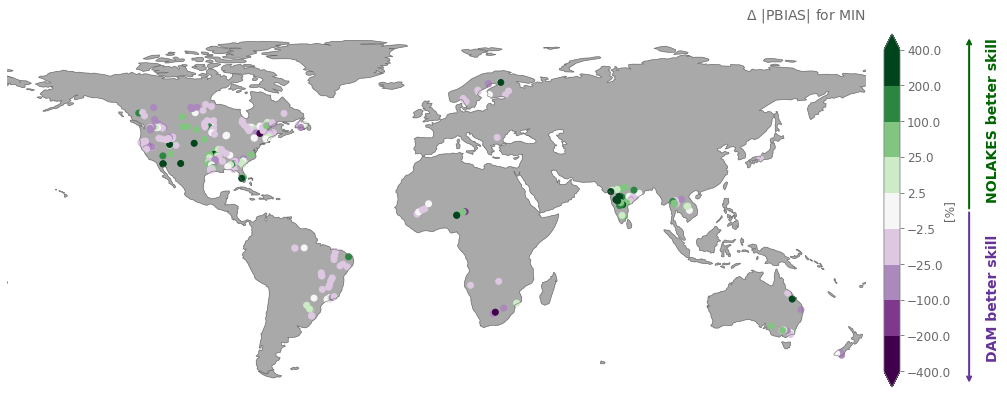

In [10]:
# PBIAS example for colormap
index = 'MIN'
ticks = [-400,-200,-100,-25,-2.5,2.5,25,100,200,400]
ax = map_gsim_pabias_diff(index, metrics_dnolak_dict,  'NOLAKES', ticks)
plt.savefig(scriptsdir+'plots/gsim_pbias_NOLAKE_cbar.png', bbox_inches="tight", dpi=500)

NOLAKE


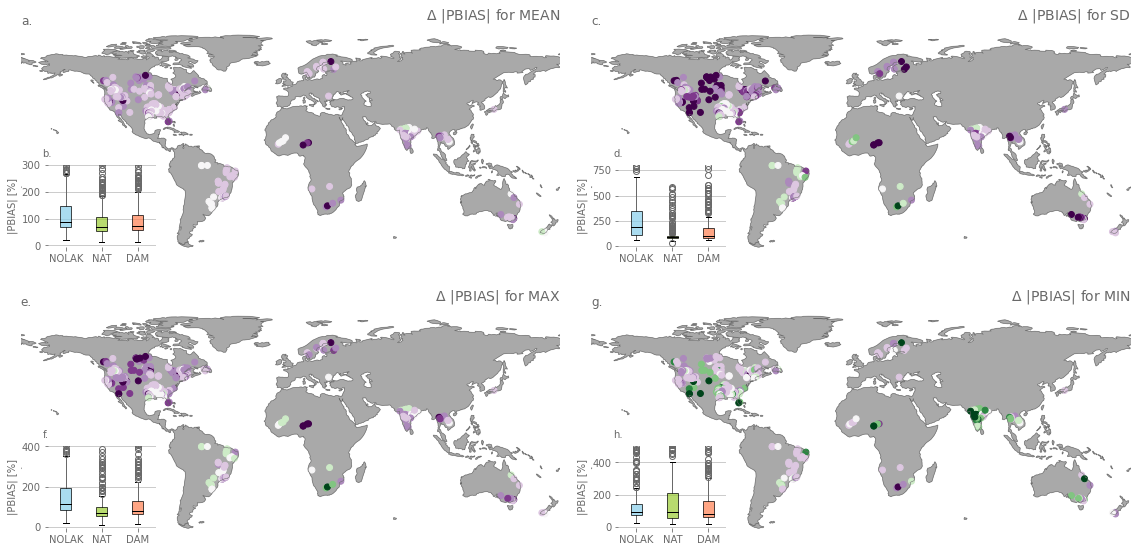

In [11]:
fig, axes = plt.subplots(2,2, figsize = (16,8),subplot_kw={'projection': ccrs.PlateCarree(), 'frameon':False})
print('NOLAKE')
count = 0
boxplot_limits = {'MAX':(-5,400), 'MEAN':(-5,300), 'MIN':(-5,500), 'SD':(-5,800)}

for i, ax in enumerate(axes.flatten()): 
    index = indices[i]
    ticks = [-400,-200,-100,-25,-2.5,2.5,25,100,200,400]
    map_gsim_pabias_diff(index, metrics_dnolak_dict,  'NOLAKE', ticks, ax=ax, plot_colorbar=False)
    ax.text(0, 1.005, panel_labels[count], color='dimgrey', fontsize=12, transform=ax.transAxes);
    count = count+1

    ax_inset = ax.inset_axes([0.05, 0.05, 0.2, 0.35])

    
    
    plot_boxplot(ax_inset,indices_permetric_percase_dict, cases, 'PABIAS', index, boxplot_limits[index], flag_subplot=True)
    ax_inset.spines["top"].set_visible(False)
    ax_inset.spines["bottom"].set_visible(False)
    ax_inset.spines["left"].set_visible(False)
    ax_inset.spines["right"].set_visible(False)
    ax_inset.text(-0.05, 1.1, panel_labels[count], color='dimgrey', fontsize=10, transform=ax_inset.transAxes);
    count = count+1

fig.tight_layout()
fig.savefig(scriptsdir+'plots/gsim_pbias_NOLAKE.png', bbox_inches="tight", dpi=500)

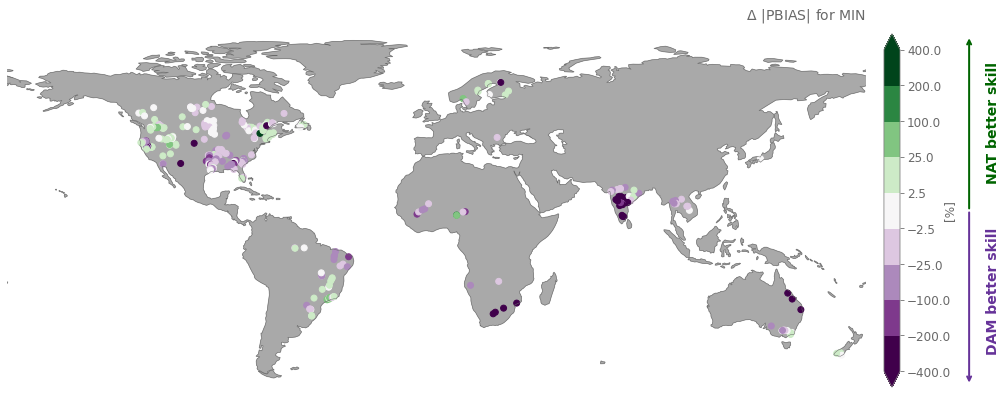

In [ ]:
# PBIAS example for colormap NATLAKE
index = 'MIN'
ticks = [-400,-200,-100,-25,-2.5,2.5,25,100,200,400]
ax = map_gsim_pabias_diff(index, metrics_dnatlak_dict,  'NAT', ticks)
plt.savefig(scriptsdir+'plots/gsim_pbias_NAT_cbar.png', bbox_inches="tight", dpi=500)

NATLAKE


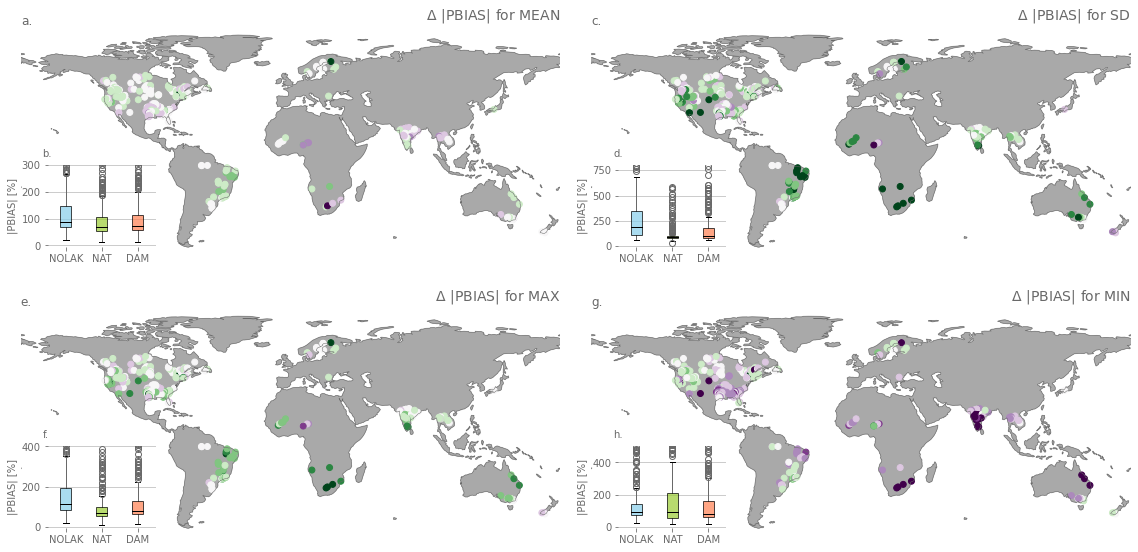

In [13]:
fig, axes = plt.subplots(2,2, figsize = (16,8),subplot_kw={'projection': ccrs.PlateCarree(), 'frameon':False})
print('NATLAKE')
count = 0
boxplot_limits = {'MAX':(-5,400), 'MEAN':(-5,300), 'MIN':(-5,500), 'SD':(-5,800)}

for i, ax in enumerate(axes.flatten()): 
    index = indices[i]
    ticks = [-400,-200,-100,-25,-2.5,2.5,25,100,200,400]

    map_gsim_pabias_diff(index, metrics_dnatlak_dict,  'NAT', ticks, ax=ax, plot_colorbar=False)
    ax.text(0, 1.005, panel_labels[count], color='dimgrey', fontsize=12, transform=ax.transAxes);
    count = count+1

    ax_inset = ax.inset_axes([0.05, 0.05, 0.2, 0.35])

    
    
    plot_boxplot(ax_inset,indices_permetric_percase_dict, cases, 'PABIAS', index, boxplot_limits[index], flag_subplot=True)
    ax_inset.spines["top"].set_visible(False)
    ax_inset.spines["bottom"].set_visible(False)
    ax_inset.spines["left"].set_visible(False)
    ax_inset.spines["right"].set_visible(False)
    ax_inset.text(-0.05, 1.1, panel_labels[count], color='dimgrey', fontsize=10, transform=ax_inset.transAxes);
    count = count+1

fig.tight_layout()
fig.savefig(scriptsdir+'plots/gsim_pbias_NAT.png', bbox_inches="tight", dpi=500)

In [ ]:
fig, axes = plt.subplots(2,2, figsize = (20,10),subplot_kw={'projection': ccrs.PlateCarree(), 'frameon':False})
print('NATLAKE')
for i,ax in enumerate(axes.flatten()): 
    index = indices[i]
    ticks = [-400,-200,-100,-25,-2.5,2.5,25,100,200,400]


    map_gsim_pabias_diff(index, metrics_dnatlak_dict,  'NAT', ticks, ax=ax, flag_arrows=False)
    ax_inset = ax.inset_axes([0.05, 0.05, 0.2, 0.3])

    plot_boxplot(ax_inset,indices_permetric_percase_dict, cases, 'PABIAS', index, limits=(-5,400))
    ax_inset.spines["top"].set_visible(False)
    ax_inset.spines["bottom"].set_visible(False)
    ax_inset.spines["left"].set_visible(False)
    ax_inset.spines["right"].set_visible(False)
fig.tight_layout()

In [ ]:
metric = 'MAX'
ticks = [-400,-200,-100,-25,-2.5,2.5,25,100,200,400]

ax = map_gsim_pabias_diff(index, metrics_dnatlak_dict,  'NAT', ticks)
ax_inset = ax.inset_axes([0.05, 0.05, 0.2, 0.3])

plot_boxplot(ax_inset,indices_permetric_percase_dict, cases, 'PABIAS', index, limits=(-5,500))
ax_inset.spines["top"].set_visible(False)
ax_inset.spines["bottom"].set_visible(False)
ax_inset.spines["left"].set_visible(False)
ax_inset.spines["right"].set_visible(False)

In [ ]:
metric = 'MEAN'
ticks = [-400,-200,-100,-25,-2.5,2.5,25,100,200,400]

ax = map_gsim_pabias_diff(index, metrics_dnolak_dict,  'NOLAKE', ticks)
ax_inset = ax.inset_axes([0.05, 0.05, 0.2, 0.3])

plot_boxplot(ax_inset,indices_permetric_percase_dict, cases, 'PABIAS', index, limits=(-5,600))
ax_inset.spines["top"].set_visible(False)
ax_inset.spines["bottom"].set_visible(False)
ax_inset.spines["left"].set_visible(False)
ax_inset.spines["right"].set_visible(False)

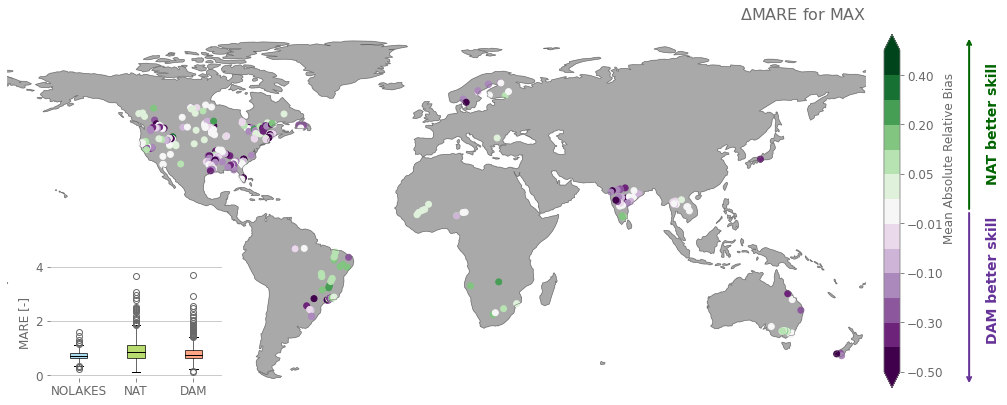

In [ ]:
index = indices[0]
ticks = [-0.5, -0.4,-0.3,-0.2,-0.1,-0.05,-0.01,0.01,0.05,0.1,0.2,0.3,0.4,0.5]
ax = map_gsim_mare_diff(index, metrics_dnatlak_dict,  'NAT',ticks = ticks)

ax_inset = ax.inset_axes([0.05, 0.05, 0.2, 0.3])

plot_boxplot(ax_inset,indices_permetric_percase_dict, cases, 'MARE', index, limits=(-0.1,4))
ax_inset.spines["top"].set_visible(False)
ax_inset.spines["bottom"].set_visible(False)
ax_inset.spines["left"].set_visible(False)
ax_inset.spines["right"].set_visible(False)



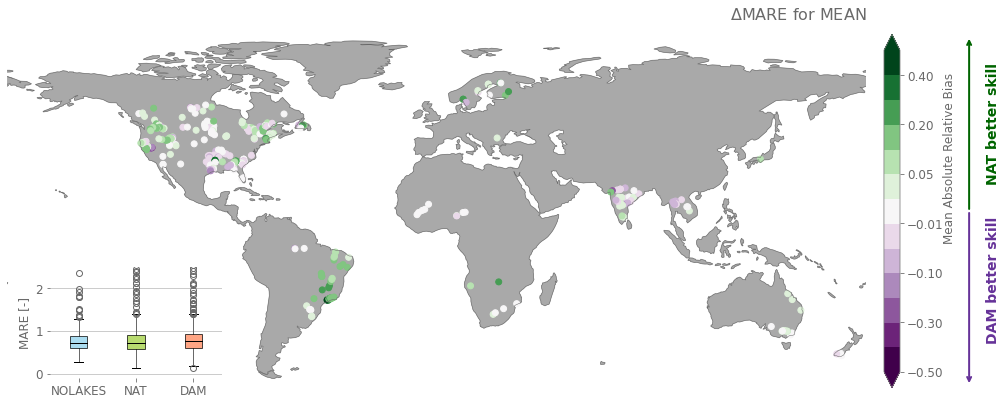

In [61]:
index = indices[1]
ax = map_gsim_mare_diff(index, metrics_dnatlak_dict,  'NAT', ticks)
ax_inset = ax.inset_axes([0.05, 0.05, 0.2, 0.3])
plot_boxplot(ax_inset,indices_permetric_percase_dict, cases, 'MARE', index, limits=(-0.1,2.5))

ax_inset.spines["top"].set_visible(False)
ax_inset.spines["bottom"].set_visible(False)
ax_inset.spines["left"].set_visible(False)
ax_inset.spines["right"].set_visible(False)

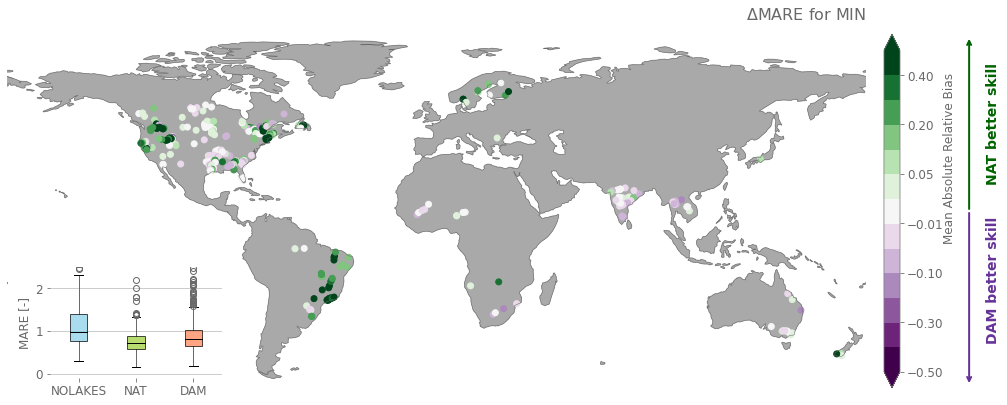

In [62]:
index = indices[2]
ax = map_gsim_mare_diff(index, metrics_dnatlak_dict,  'NAT', ticks)
ax_inset = ax.inset_axes([0.05, 0.05, 0.2, 0.3])
plot_boxplot(ax_inset,indices_permetric_percase_dict, cases, 'MARE', index, limits=(-0.1,2.5))

ax_inset.spines["top"].set_visible(False)
ax_inset.spines["bottom"].set_visible(False)
ax_inset.spines["left"].set_visible(False)
ax_inset.spines["right"].set_visible(False)

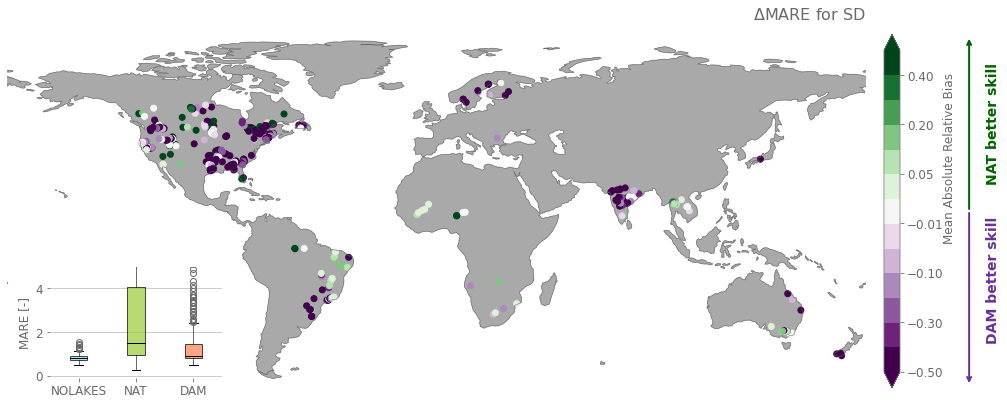

In [63]:
index = indices[3]
ax = map_gsim_mare_diff(index, metrics_dnatlak_dict,  'NAT', ticks)
ax_inset = ax.inset_axes([0.05, 0.05, 0.2, 0.3])
plot_boxplot(ax_inset,indices_permetric_percase_dict, cases, 'MARE', index, limits=(-0.1,5))

ax_inset.spines["top"].set_visible(False)
ax_inset.spines["bottom"].set_visible(False)
ax_inset.spines["left"].set_visible(False)
ax_inset.spines["right"].set_visible(False)

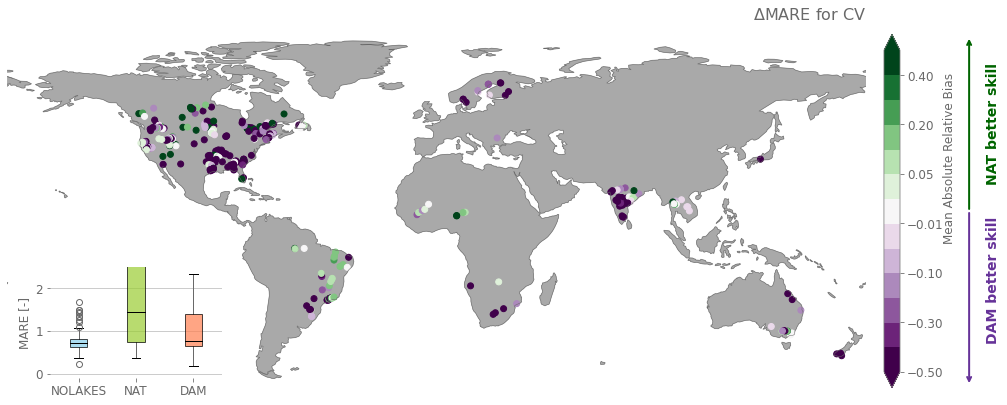

In [64]:
index = indices[4]
ax = map_gsim_mare_diff(index, metrics_dnatlak_dict,  'NAT', ticks)
ax_inset = ax.inset_axes([0.05, 0.05, 0.2, 0.3])
plot_boxplot(ax_inset,indices_permetric_percase_dict, cases, 'MARE', index, limits=(-0.1,2.5))

ax_inset.spines["top"].set_visible(False)
ax_inset.spines["bottom"].set_visible(False)
ax_inset.spines["left"].set_visible(False)
ax_inset.spines["right"].set_visible(False)

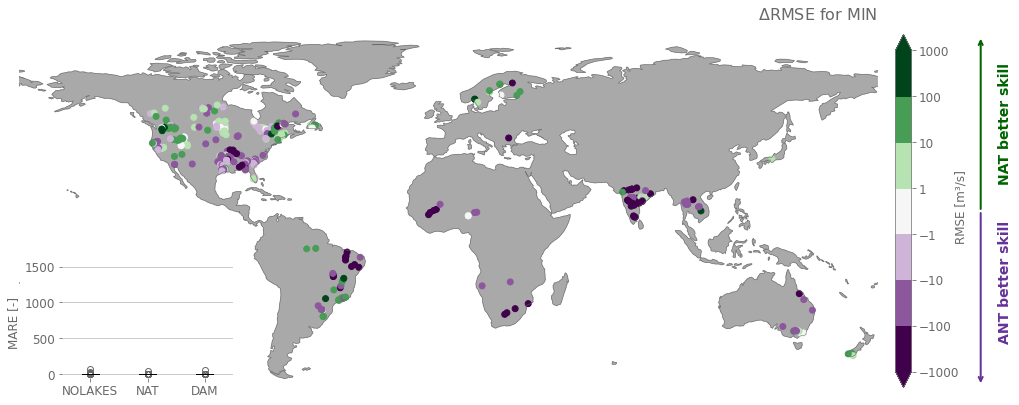

In [65]:
index = 'MIN'

ax = map_gsim_rmse_diff(index, metrics_dnatlak_dict,  'NAT')

ax_inset = ax.inset_axes([0.05, 0.05, 0.2, 0.3])

plot_boxplot(ax_inset,indices_permetric_percase_dict, cases, 'MARE', index, (-50,1500))
ax_inset.spines["top"].set_visible(False)
ax_inset.spines["bottom"].set_visible(False)
ax_inset.spines["left"].set_visible(False)
ax_inset.spines["right"].set_visible(False)

plt.savefig(scriptsdir+'plots/GSIM_'+index+'.png', bbox_inches="tight")


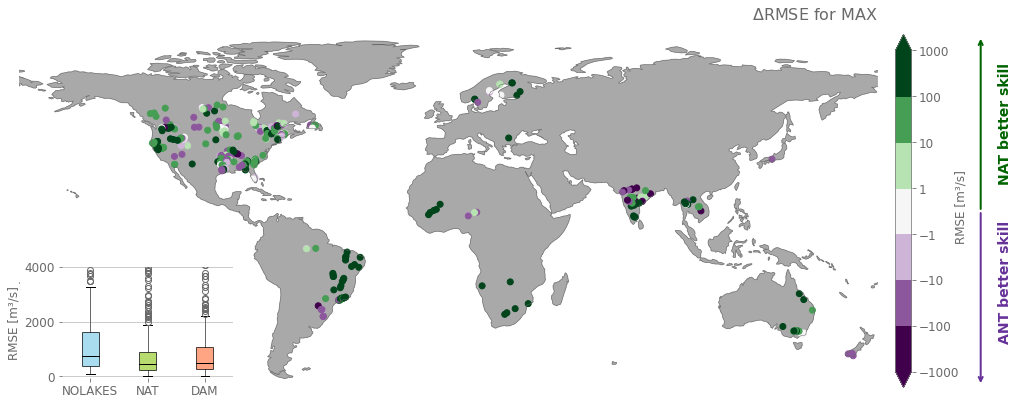

In [23]:
index = 'MAX'

ax = map_gsim_rmse_diff(index, metrics_dnatlak_dict,  'NAT')

ax_inset = ax.inset_axes([0.05, 0.05, 0.2, 0.3])

plot_boxplot(ax_inset,indices_permetric_percase_dict, cases, 'RMSE', index, (-50,4000))
ax_inset.spines["top"].set_visible(False)
ax_inset.spines["bottom"].set_visible(False)
ax_inset.spines["left"].set_visible(False)
ax_inset.spines["right"].set_visible(False)

plt.savefig(scriptsdir+'plots/GSIM_'+index+'.png', bbox_inches="tight")


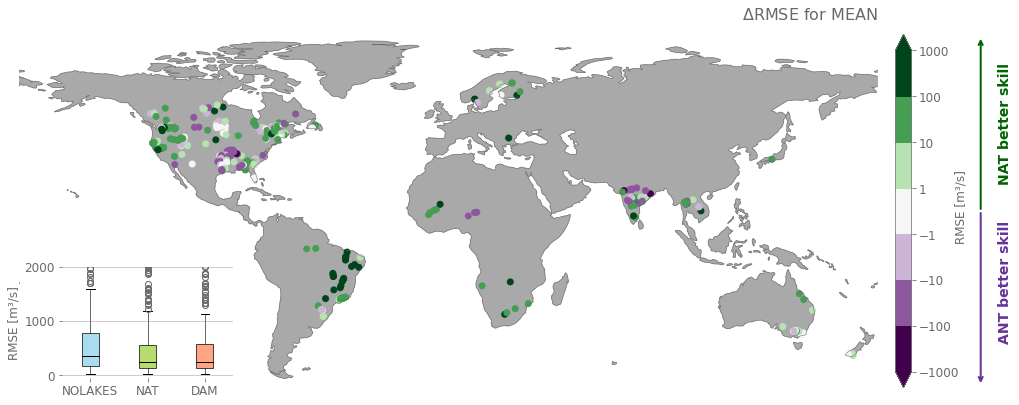

In [24]:
index = 'MEAN'

ax = map_gsim_rmse_diff(index, metrics_dnatlak_dict,  'NAT')

ax_inset = ax.inset_axes([0.05, 0.05, 0.2, 0.3])

plot_boxplot(ax_inset,indices_permetric_percase_dict, cases, 'RMSE', index, (-50,2000))
ax_inset.spines["top"].set_visible(False)
ax_inset.spines["bottom"].set_visible(False)
ax_inset.spines["left"].set_visible(False)
ax_inset.spines["right"].set_visible(False)

fig.savefig(scriptsdir+'plots/KGE_RMSE_outflow.png', bbox_inches="tight")

plt.savefig(scriptsdir+'plots/GSIM_'+index+'.png', bbox_inches="tight")


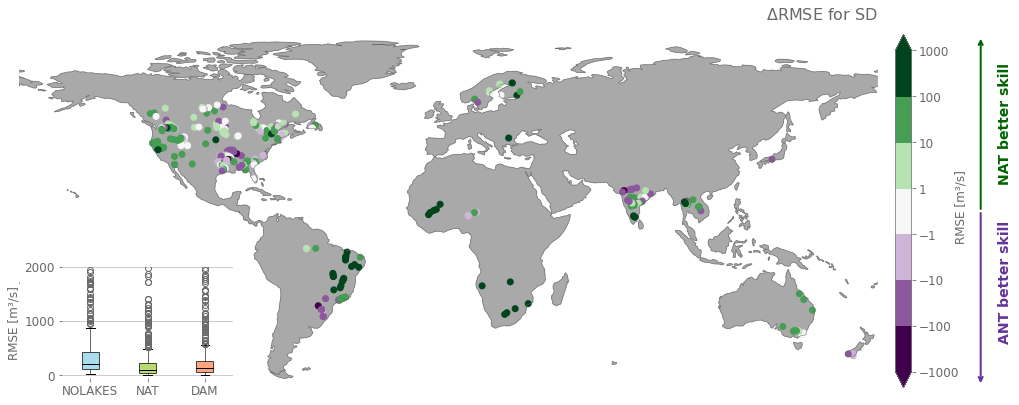

In [25]:
index = 'SD'

ax = map_gsim_rmse_diff(index, metrics_dnatlak_dict,  'NAT')

ax_inset = ax.inset_axes([0.05, 0.05, 0.2, 0.3])

plot_boxplot(ax_inset,indices_permetric_percase_dict, cases, 'RMSE',index, (-50,2000))
ax_inset.spines["top"].set_visible(False)
ax_inset.spines["bottom"].set_visible(False)
ax_inset.spines["left"].set_visible(False)
ax_inset.spines["right"].set_visible(False)

fig.savefig(scriptsdir+'plots/KGE_RMSE_outflow.png', bbox_inches="tight")

plt.savefig(scriptsdir+'plots/GSIM_'+index+'.png', bbox_inches="tight")


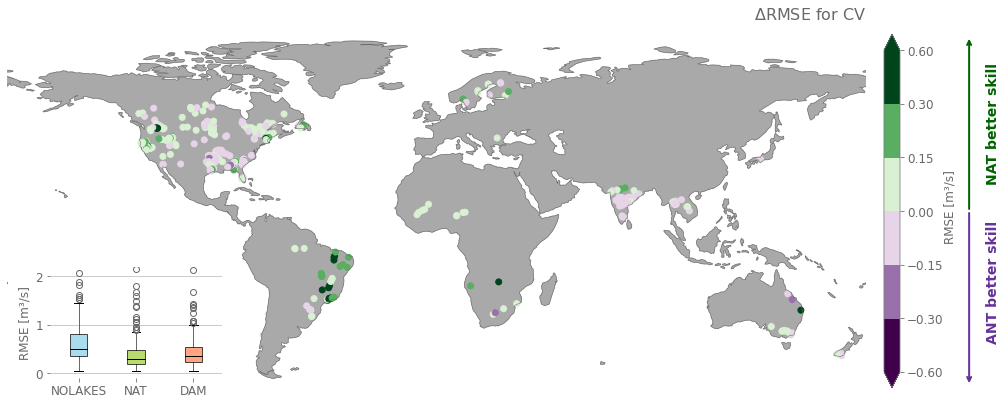

In [26]:
index = 'CV'

ax = map_gsim_rmse_diff(index, metrics_dnatlak_dict,  'NAT', ticks=[-0.6,-0.3,-0.15, 0,0.15, 0.3,0.6])

ax_inset = ax.inset_axes([0.05, 0.05, 0.2, 0.3])

plot_boxplot(ax_inset,indices_permetric_percase_dict, cases, 'RMSE', index, (-0.1,2.2))
ax_inset.spines["top"].set_visible(False)
ax_inset.spines["bottom"].set_visible(False)
ax_inset.spines["left"].set_visible(False)
ax_inset.spines["right"].set_visible(False)

fig.savefig(scriptsdir+'plots/KGE_RMSE_outflow.png', bbox_inches="tight")

plt.savefig(scriptsdir+'plots/GSIM_'+index+'.png', bbox_inches="tight")


In [ ]:

fig, ax = plt.subplots(1,1, figsize=(4,3))
plot_boxplot(ax,indices_permetric_percase_dict, cases, metric, index,units, limits )


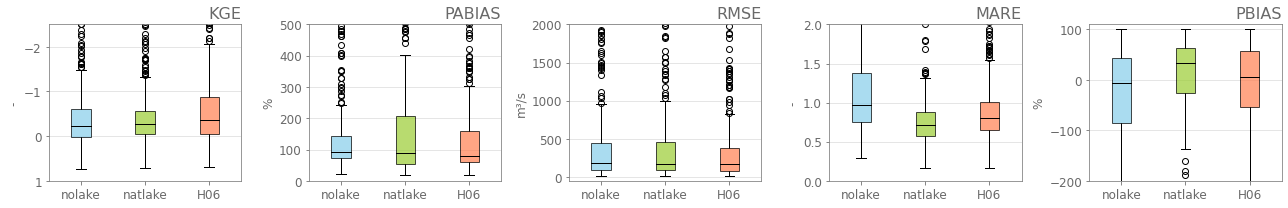

In [ ]:
indices =['MAX', 'MEAN', 'MIN','SD']
metrics = ['KGE', 'PABIAS','RMSE', 'MARE','PBIAS']

units = {'KGE': '-', 'PABIAS': '%', 'RMSE': 'm³/s', 'MARE': '-','PBIAS': '%'}
limits = {'KGE': (1,-2.5), 'PABIAS': (0,500), 'RMSE':(-50,2000), 'MARE': (0,2),'PBIAS': (-200,110)}

fig, axes = plt.subplots(1,len(metrics), figsize=(18,3))

for i, metric in enumerate(metrics):
    
    # get data in boxplot format
    data_for_boxplot = np.empty((len(indices_permetric_percase_dict[cases[0]][metric][index]), len(cases)))
    for j, case in enumerate(cases):
        data_for_boxplot[:,j] = indices_permetric_percase_dict[case][metric][index].values 
    data_for_boxplot[np.isinf(data_for_boxplot)] = np.nan # remove infinite values
    data_for_boxplot = data_for_boxplot[~np.isnan(data_for_boxplot).any(axis=1),:] # remove rows with nans

    
    bplot = axes[i].boxplot(data_for_boxplot,patch_artist=True, medianprops=dict(color='k'));
    axes[i].yaxis.grid(True, linestyle='-', which='major', color='silver', alpha=0.5)
    axes[i].set_xticklabels(cases)
    axes[i].set_title(metric, loc='right')
    axes[i].set_ylabel(units[metric]);
    axes[i].set_ylim(limits[metric])
    
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

fig.tight_layout()

MEAN


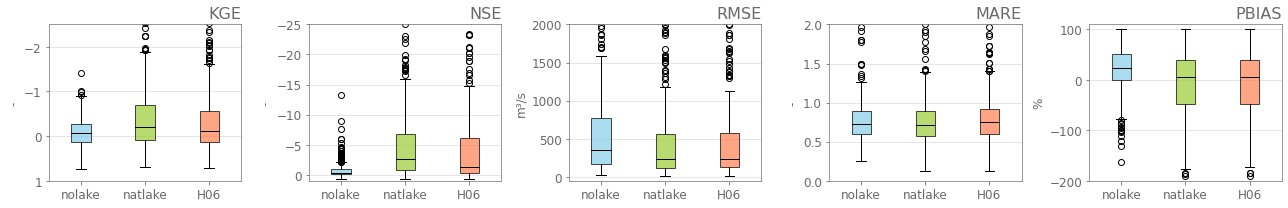

In [ ]:
index='MEAN'
print(index)
metrics = ['KGE', 'NSE','RMSE', 'MARE','PABIAS']

units = {'KGE': '-', 'NSE': '-', 'RMSE': 'm³/s', 'MARE': '-','PBIAS': '%'}
limits = {'KGE': (1,-2.5), 'NSE': (1,-25), 'RMSE':(-50,2000), 'MARE': (0,2),'PBIAS': (-200,110)}

fig, axes = plt.subplots(1,len(metrics), figsize=(18,3))

for i, metric in enumerate(metrics):
    
    # get data in boxplot format
    data_for_boxplot = np.empty((len(indices_permetric_percase_dict[cases[0]][metric][index]), len(cases)))
    for j, case in enumerate(cases):
        data_for_boxplot[:,j] = indices_permetric_percase_dict[case][metric][index].values 
    data_for_boxplot[np.isinf(data_for_boxplot)] = np.nan # remove infinite values
    data_for_boxplot = data_for_boxplot[~np.isnan(data_for_boxplot).any(axis=1),:] # remove rows with nans

    
    bplot = axes[i].boxplot(data_for_boxplot,patch_artist=True, medianprops=dict(color='k'));
    axes[i].yaxis.grid(True, linestyle='-', which='major', color='silver', alpha=0.5)
    axes[i].set_xticklabels(cases)
    axes[i].set_title(metric, loc='right')
    axes[i].set_ylabel(units[metric]);
    axes[i].set_ylim(limits[metric])
    
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

fig.tight_layout()

In [ ]:
# KGE elements individual

index='MEAN'
print(index)
metrics = ['KGE', 'pearson', 'alpha', 'beta']

units = {'KGE': '-', 'pearson': '-', 'alpha': '-', 'beta': '-'}
limits = {'KGE': (1,-2.5), 'pearson': (-1,1), 'alpha':(-0.1,7), 'beta': (-0.1,3.5)}
titles = {'KGE':'KGE', 'pearson': 'correlation', 'alpha': '$\sigma_{mod}$/$\sigma_{obs}$', 'beta': '$\mu_{mod}$/$\mu_{obs}$'}



fig, axes = plt.subplots(1,len(metrics), figsize=(18,3))

for i, metric in enumerate(metrics):
    
    # get data in boxplot format
    data_for_boxplot = np.empty((len(indices_permetric_percase_dict[cases[0]][metric][index]), len(cases)))
    for j, case in enumerate(cases):
        data_for_boxplot[:,j] = indices_permetric_percase_dict[case][metric][index].values 
    data_for_boxplot[np.isinf(data_for_boxplot)] = np.nan # remove infinite values
    data_for_boxplot = data_for_boxplot[~np.isnan(data_for_boxplot).any(axis=1),:] # remove rows with nans

    
    bplot = axes[i].boxplot(data_for_boxplot,patch_artist=True, medianprops=dict(color='k'), vert=False);
    axes[i].yaxis.grid(True, linestyle='-', which='major', color='silver', alpha=0.5)
    axes[i].set_xticklabels(cases)
    axes[i].set_title(titles[metric], loc='right')
    axes[i].set_ylabel(units[metric]);
    axes[i].set_ylim(limits[metric])
    
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

fig.tight_layout()

In [ ]:
index='MAX'
print(index)
metrics = ['KGE', 'NSE','RMSE', 'MARE','PBIAS']

units = {'KGE': '-', 'NSE': '-', 'RMSE': 'm³/s', 'MARE': '-','PBIAS': '%'}
limits = {'KGE': (1,-4.5), 'NSE': (1,-41), 'RMSE':(-50,3500), 'MARE': (0,3),'PBIAS': (-250,110)}

fig, axes = plt.subplots(1,len(metrics), figsize=(18,3))

for i, metric in enumerate(metrics):
    
    # get data in boxplot format
    data_for_boxplot = np.empty((len(indices_permetric_percase_dict[cases[0]][metric][index]), len(cases)))
    for j, case in enumerate(cases):
        data_for_boxplot[:,j] = indices_permetric_percase_dict[case][metric][index].values 
    data_for_boxplot[np.isinf(data_for_boxplot)] = np.nan # remove infinite values
    data_for_boxplot = data_for_boxplot[~np.isnan(data_for_boxplot).any(axis=1),:] # remove rows with nans

    
    bplot = axes[i].boxplot(data_for_boxplot,patch_artist=True, medianprops=dict(color='k'));
    axes[i].yaxis.grid(True, linestyle='-', which='major', color='silver', alpha=0.5)
    axes[i].set_xticklabels(cases)
    axes[i].set_title(metric, loc='right')
    axes[i].set_ylabel(units[metric]);
    axes[i].set_ylim(limits[metric])
    
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

fig.tight_layout()

In [ ]:
index='MIN'
print(index)
metrics = ['KGE', 'NSE','RMSE', 'MARE','PBIAS']

units = {'KGE': '-', 'NSE': '-', 'RMSE': 'm³/s', 'MARE': '-','PBIAS': '%'}
limits = {'KGE': (1,-2.5), 'NSE': (1,-27), 'RMSE':(-50,1000), 'MARE': (0,2.25),'PBIAS': (-300,110)}

fig, axes = plt.subplots(1,len(metrics), figsize=(18,3))

for i, metric in enumerate(metrics):
    
    # get data in boxplot format
    data_for_boxplot = np.empty((len(indices_permetric_percase_dict[cases[0]][metric][index]), len(cases)))
    for j, case in enumerate(cases):
        data_for_boxplot[:,j] = indices_permetric_percase_dict[case][metric][index].values 
    data_for_boxplot[np.isinf(data_for_boxplot)] = np.nan # remove infinite values
    data_for_boxplot = data_for_boxplot[~np.isnan(data_for_boxplot).any(axis=1),:] # remove rows with nans

    
    bplot = axes[i].boxplot(data_for_boxplot,patch_artist=True, medianprops=dict(color='k'));
    axes[i].yaxis.grid(True, linestyle='-', which='major', color='silver', alpha=0.5)
    axes[i].set_xticklabels(cases)
    axes[i].set_title(metric, loc='right')
    axes[i].set_ylabel(units[metric]);
    axes[i].set_ylim(limits[metric])
    
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

fig.tight_layout()

In [ ]:
index='SD'
print(index)
metrics = ['KGE', 'NSE','RMSE', 'MARE','PBIAS']

units = {'KGE': '-', 'NSE': '-', 'RMSE': 'm³/s', 'MARE': '-','PBIAS': '%'}
limits = {'KGE': (1,-18), 'NSE': (10,-200), 'RMSE':(-50,900), 'MARE': (0,10),'PBIAS': (-1100,110)}

fig, axes = plt.subplots(1,len(metrics), figsize=(18,3))

for i, metric in enumerate(metrics):
    
    # get data in boxplot format
    data_for_boxplot = np.empty((len(indices_permetric_percase_dict[cases[0]][metric][index]), len(cases)))
    for j, case in enumerate(cases):
        data_for_boxplot[:,j] = indices_permetric_percase_dict[case][metric][index].values 
    data_for_boxplot[np.isinf(data_for_boxplot)] = np.nan # remove infinite values
    data_for_boxplot = data_for_boxplot[~np.isnan(data_for_boxplot).any(axis=1),:] # remove rows with nans

    
    bplot = axes[i].boxplot(data_for_boxplot,patch_artist=True, medianprops=dict(color='k'));
    axes[i].yaxis.grid(True, linestyle='-', which='major', color='silver', alpha=0.5)
    axes[i].set_xticklabels(cases)
    axes[i].set_title(metric, loc='right')
    axes[i].set_ylabel(units[metric]);
    axes[i].set_ylim(limits[metric])
    
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

fig.tight_layout()

In [ ]:
index='CV'
print(index)
metrics = ['KGE', 'NSE','RMSE', 'MARE','PBIAS']

units = {'KGE': '-', 'NSE': '-', 'RMSE': 'm³/s', 'MARE': '-','PBIAS': '%'}
limits = {'KGE': (1,-13), 'NSE': (1,-150), 'RMSE':(-50,200), 'MARE': (0,10),'PBIAS': (-1000,110)}

fig, axes = plt.subplots(1,len(metrics), figsize=(18,3))

for i, metric in enumerate(metrics):
    
    # get data in boxplot format
    data_for_boxplot = np.empty((len(indices_permetric_percase_dict[cases[0]][metric][index]), len(cases)))
    for j, case in enumerate(cases):
        data_for_boxplot[:,j] = indices_permetric_percase_dict[case][metric][index].values 
    data_for_boxplot[np.isinf(data_for_boxplot)] = np.nan # remove infinite values
    data_for_boxplot = data_for_boxplot[~np.isnan(data_for_boxplot).any(axis=1),:] # remove rows with nans

    
    bplot = axes[i].boxplot(data_for_boxplot,patch_artist=True, medianprops=dict(color='k'));
    axes[i].yaxis.grid(True, linestyle='-', which='major', color='silver', alpha=0.5)
    axes[i].set_xticklabels(cases)
    axes[i].set_title(metric, loc='right')
    axes[i].set_ylabel(units[metric]);
    axes[i].set_ylim(limits[metric])
    
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

fig.tight_layout()

In [ ]:
# assign metric per case to geopandas for plotting purpose

# chose metric 
metric = 'PBIAS' #'KGE', 'RMSE', 'BIAS'
case = cases[2]
index = 'MEAN'

# create dataframe for certain metric per case and per station
df_metrics_perstation = pd.DataFrame({'gsim_no':list(metrics_percase_dict[case].keys())})
col = pd.DataFrame()
for gsim_no in metrics_percase_dict[case].keys(): 
    df = pd.DataFrame(metrics_percase_dict[case][gsim_no][metric]).transpose()
    df['gsim_no'] = gsim_no
    col=col.append(df)
df_metrics_perstation = df_metrics_perstation.merge(col,on='gsim_no',how='left')

# merge metric per station to 
gdf_metric = gdf_stations.merge(df_metrics_perstation, left_on = 'gsim.no',right_on='gsim_no',how='inner')

In [ ]:
# chose metric 
import matplotlib.colors as colors
metric = 'RMSE' #'KGE', 'RMSE', 'BIAS'
index = 'MIN'
case_diff = 'ANT - NAT' 
df_diff = metrics_dnatlak_dict[metric]

# merge metric per station to 
gdf_metric = gdf_stations.merge(df_diff, left_on = 'gsim.no',right_on='gsim_no',how='inner')


In [ ]:
ticks = [-1000,-100,-10,-1,1,10,100,1000]
title = metric+ ' '+index+' for '+case
cbar_label = units[metric]
cmap = 'RdBu'
column_toplot = index
gdf_toplot = gdf_metric
norm = colors.BoundaryNorm(boundaries=ticks, ncolors=256)
#norm = mpl.colors.SymLogNorm(linthresh=1, linscale=1.0, vmin=vmin, vmax=vmax)
proj=ccrs.PlateCarree()
plt.rcParams["figure.figsize"] = (16,10)
ax = plt.axes(projection=proj, frameon=False)
gdf_toplot.plot(ax=ax, column=column_toplot, legend=True, norm = norm, cmap=cmap, legend_kwds={'label': cbar_label, 'fraction': 0.05,'pad':0.02, 'extend':'both', 'orientation':'vertical'})
ax.coastlines(color='dimgray', linewidth=0.5)
ax.set_title(title, loc='right');
ax.add_feature(cart.feature.LAND, zorder=0, color="darkgray", edgecolor='w');
ax.set_extent((-180,180,-63,90), crs=proj) 

xpos = 1.1
ypos = 0.5

ax.annotate('', xy=(xpos,ypos), xycoords=("axes fraction"), xytext=(xpos,ypos+0.5), arrowprops=dict(arrowstyle="<-", color="darkblue",linewidth=1.5));
ax.annotate('', xy=(xpos,ypos), xycoords=("axes fraction"), xytext=(xpos,ypos-0.5), arrowprops=dict(arrowstyle="<-", color="maroon",linewidth=1.5));

xpos_text = xpos+0.1

ax.annotate('ANT best skill', xy=(xpos_text,ypos+0.25), xycoords=("axes fraction"), xytext=(0,-0.1), fontsize=12); 
ax.annotate('NAT best skill', xy=(xpos_text,ypos-0.25), xycoords=("axes fraction"), xytext=(0,-0.1), fontsize=12); 

In [ ]:
# assign metric per case to geopandas for plotting purpose

# chose metric 
metric = 'KGE' #'KGE', 'RMSE', 'BIAS'
case = cases[2]
index = 'MAX'


# create dataframe for certain metric per case and per station
df_metrics_perstation = pd.DataFrame({'gsim_no':list(metrics_percase_dict[case].keys())})
col = pd.DataFrame()
for gsim_no in metrics_percase_dict[case].keys(): 
    df = pd.DataFrame(metrics_percase_dict[case][gsim_no][metric]).transpose()
    df['gsim_no'] = gsim_no
    col=col.append(df)
df_metrics_perstation = df_metrics_perstation.merge(col,on='gsim_no',how='left')

# merge metric per station to 
gdf_metric = gdf_stations.merge(df_metrics_perstation, left_on = 'gsim.no',right_on='gsim_no',how='inner')

In [ ]:


title = metric+ ' '+index+' for '+case
cbar_label = units[metric]
cmap = 'Blues_r'
column_toplot = index
gdf_toplot = gdf_metric
vmin = -2
vmax = 1

proj=ccrs.Robinson()
plt.rcParams["figure.figsize"] = (16,10)
ax = plt.axes(projection=proj, frameon=False)
gdf_toplot.plot(ax=ax, column=column_toplot, legend=True, vmin=vmin,vmax=vmax,cmap=cmap, legend_kwds={'label': cbar_label, 'fraction': 0.019, 'pad':0.02, 'extend':'min'})
ax.coastlines(color='dimgray', linewidth=0.5)
ax.set_title(title, loc='right');
ax.add_feature(cart.feature.LAND, zorder=0, color="darkgray", edgecolor='w');
ax.set_extent((-180,180,-63,90), crs=proj) 
